<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n20.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.835058,58.708604,75.761319,0.000004,185.304986,185.305035,-0.000049
1,0.0,1.0,76.372165,86.064286,57.609713,-0.000012,230.046152,230.046121,0.000031
2,0.0,2.0,39.354317,59.720925,48.222672,-0.000037,157.297877,157.297948,-0.000071
3,0.0,3.0,65.700672,38.372356,99.460227,-0.000186,213.533070,213.533363,-0.000293
4,0.0,4.0,92.183128,77.742463,79.311943,-0.000013,259.237520,259.237517,0.000004
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.572565,86.830128,38.581518,0.000003,193.984215,193.984220,-0.000005
119996,999.0,116.0,66.077174,58.243536,66.567997,-0.000046,200.888661,200.888712,-0.000051
119997,999.0,117.0,43.358532,90.055872,30.416226,-0.000020,173.830610,173.830640,-0.000030
119998,999.0,118.0,90.795176,60.545046,65.595622,0.000063,226.935907,226.935850,0.000057


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.835058,58.708604,75.761319,0.000004,185.304986,185.305035,-0.000049
1,0.0,1.0,76.372165,86.064286,57.609713,-0.000012,230.046152,230.046121,0.000031
2,0.0,2.0,39.354317,59.720925,48.222672,-0.000037,157.297877,157.297948,-0.000071
3,0.0,3.0,65.700672,38.372356,99.460227,-0.000186,213.533070,213.533363,-0.000293
4,0.0,4.0,92.183128,77.742463,79.311943,-0.000013,259.237520,259.237517,0.000004
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.572565,86.830128,38.581518,0.000003,193.984215,193.984220,-0.000005
119996,999.0,116.0,66.077174,58.243536,66.567997,-0.000046,200.888661,200.888712,-0.000051
119997,999.0,117.0,43.358532,90.055872,30.416226,-0.000020,173.830610,173.830640,-0.000030
119998,999.0,118.0,90.795176,60.545046,65.595622,0.000063,226.935907,226.935850,0.000057


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.835058,58.708604,75.761319,0.000004,185.304986,185.305035,-0.000049
1,0.0,1.0,76.372165,86.064286,57.609713,-0.000012,230.046152,230.046121,0.000031
2,0.0,2.0,39.354317,59.720925,48.222672,-0.000037,157.297877,157.297948,-0.000071
3,0.0,3.0,65.700672,38.372356,99.460227,-0.000186,213.533070,213.533363,-0.000293
4,0.0,4.0,92.183128,77.742463,79.311943,-0.000013,259.237520,259.237517,0.000004
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.572565,86.830128,38.581518,0.000003,193.984215,193.984220,-0.000005
119996,999.0,116.0,66.077174,58.243536,66.567997,-0.000046,200.888661,200.888712,-0.000051
119997,999.0,117.0,43.358532,90.055872,30.416226,-0.000020,173.830610,173.830640,-0.000030
119998,999.0,118.0,90.795176,60.545046,65.595622,0.000063,226.935907,226.935850,0.000057


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

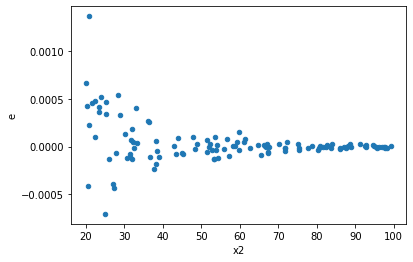

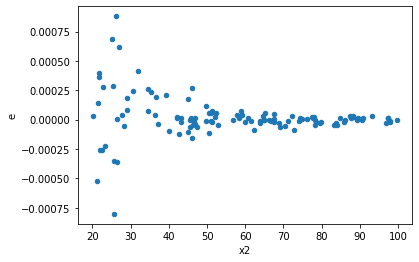

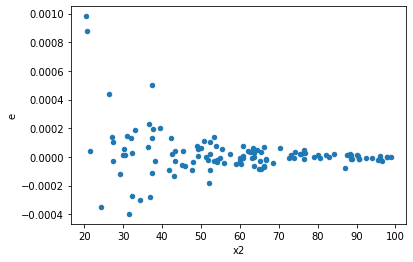

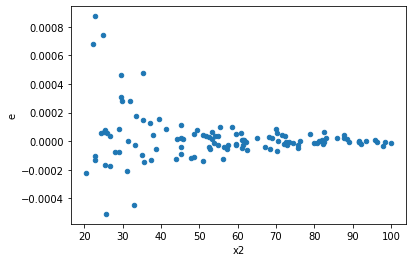

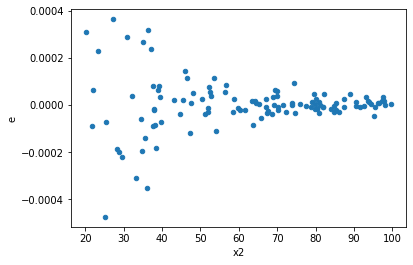

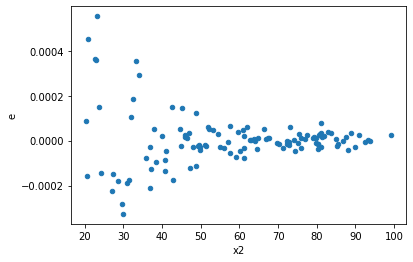

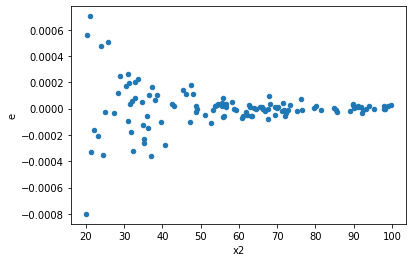

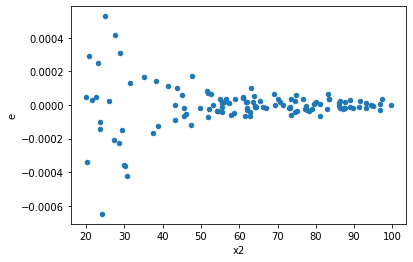

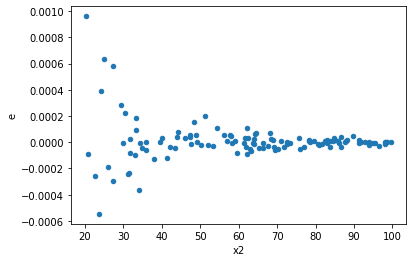

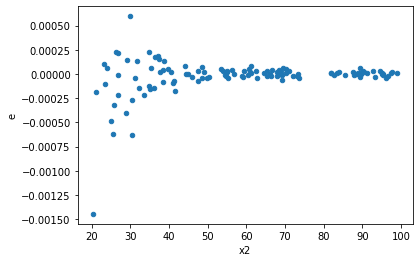

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2.0436250377986863e-08,4.712898191345973e-06,4.644602358633378e-10,1.0711132253059031e-07,0.004336238456309705,2.3624411385442333e-41,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,3.286538769462277e-08,3.859584002182451e-06,7.469406294232448e-10,8.771781823141935e-08,0.008515266846385159,7.764211173831958e-35,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,5.5236893138898186e-08,2.5810291953479853e-06,1.2553839349749587e-09,5.865975443972694e-08,0.021401111323520274,4.5501220922469026e-26,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,4.6184047116820796e-08,3.1019697617096654e-06,1.0496374344731998e-09,7.049931276612876e-08,0.01488861938208135,1.7062246183958087e-29,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,2.9653943922799668e-08,1.2997711752040733e-06,6.739532709727198e-10,2.9540253981910758e-08,0.022814741924203533,1.8079995855338186e-25,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,3.0134549877398056e-08,1.405368670875894e-06,6.848761335772285e-10,3.194019706536123e-08,0.021442451722377402,4.7437732938941566e-26,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,4.056840300156594e-08,3.167850870403229e-06,9.220091591264987e-10,7.199661069098247e-08,0.01280628560535808,6.284125065479076e-31,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,3.6227910352044915e-08,1.91475544539468e-06,8.233615989101117e-10,4.3517169213515456e-08,0.018920385075378344,3.1593404373048143e-27,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,2.1336392209473146e-08,2.816547311737594e-06,4.849180047607533e-10,6.401243890312714e-08,0.007575371491384687,5.8165614125964645e-36,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64